In [ ]:
# importing necessary libraries
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from keras.datasets import fashion_mnist
# load dataset
(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()
print('Train: X=%s, y=%s' % (X_train.shape, y_train.shape))
print('Test: X=%s, y=%s' % (X_test.shape, y_test.shape))

Train: X=(60000, 28, 28), y=(60000,)
Test: X=(10000, 28, 28), y=(10000,)


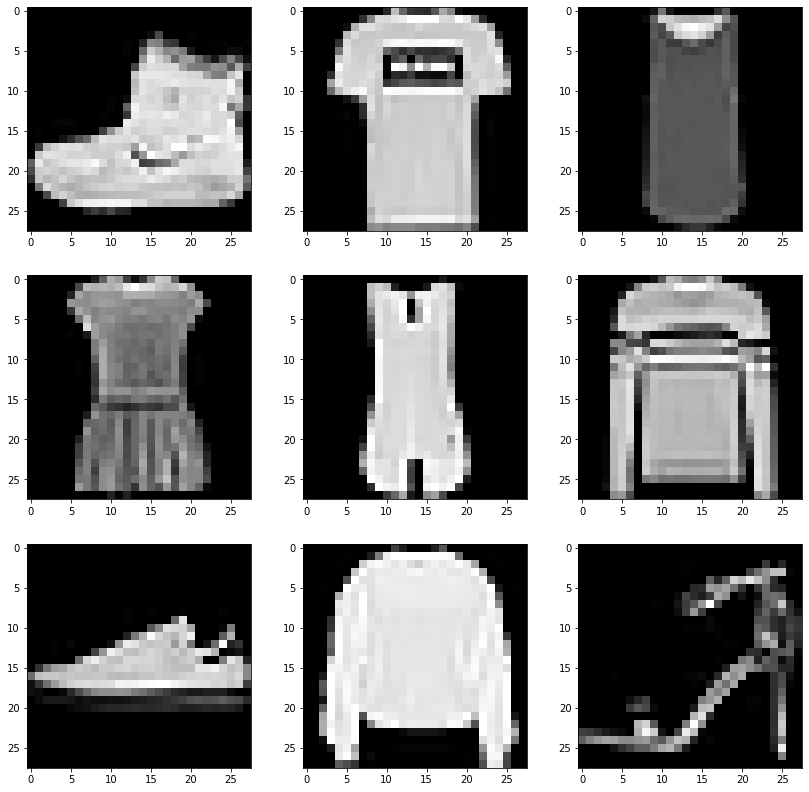

In [ ]:
# plot first few images from the dataset
def plot_image(X):
  for i in range(9):
    plt.subplot(330 + 1 + i)
    # plot raw pixel data
    plt.imshow(X[i], cmap=plt.get_cmap('gray'))
  plt.show()
plot_image(X_train)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


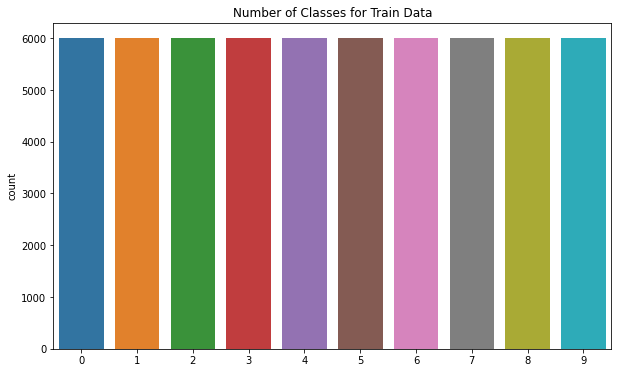

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


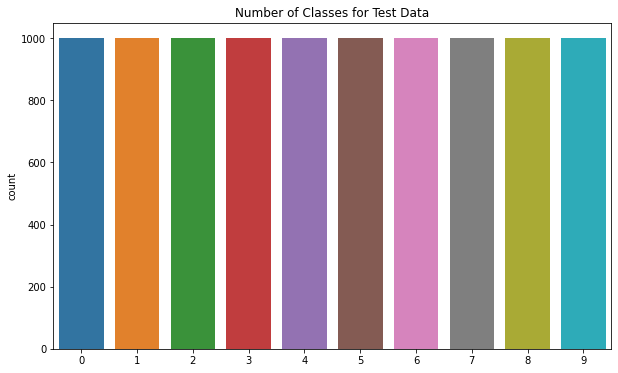

In [ ]:
import seaborn as sns
plt.figure(figsize=(10, 6))
sns.countplot(y_train)
plt.title("Number of Classes for Train Data")
plt.show()
plt.figure(figsize=(10, 6))
sns.countplot(y_test)
plt.title("Number of Classes for Test Data")
plt.show()

In [ ]:
# Create a dataframe from train data (x and y)
# merge label and pixel array,create a dataframe, of size (60000, 785). 
# Dataframe: 60000 rows. Each row holds label, pixel1, pixel2, ..., pixel784.

# data arguments
r = 28
c = 28
classes = 10
def create_dataframe(x_data,y_data):
    y_data_list = y_data.tolist()
    y_data_adjusted = np.array([y_data_list]) # needed step for contatenation
    num_images = x_data.shape[0] 
    x_data_array  = x_data.reshape(num_images, ROWS*COLUMNS)
    data_array = np.concatenate((y_data_adjusted.T, x_data_array), axis=1)
    pixel_idx = range(1,ROWS*COLUMNS+1) 
    pixel_names = ['pixel' + str(i) for i in pixel_idx]
    columns = ['label'] + pixel_names
    data_df = pd.DataFrame(data_array, columns = columns) 
    return data_df

train_data_df = create_dataframe(X_train, y_train)
test_data_df = create_dataframe(X_test, y_test)

In [ ]:
r = 28
c = 28
classes = 10

def create_dataframe(X, y):
    df = pd.DataFrame(X.reshape(X.shape[0], r*c))
    df['label'] = y
    return df
train_data_df = create_dataframe(X_train, y_train)
test_data_df = create_dataframe(X_test, y_test)

In [ ]:
train_data_df

,0,1,2,3,4,5,6,7,8,9,...,775,776,777,778,779,780,781,782,783,label
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,9
1,0,0,0,0,0,1,0,0,0,0,...,114,130,76,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,22,...,0,1,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,33,96,...,0,0,0,0,0,0,0,0,0,3
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59995,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,5
59996,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
59997,0,0,0,0,0,0,0,0,0,5,...,0,0,0,0,0,0,0,0,0,3
59998,0,0,0,0,0,0,0,0,0,0,...,54,50,5,0,1,0,0,0,0,0


In [ ]:
train_data_df

,0,1,2,3,4,5,6,7,8,9,...,775,776,777,778,779,780,781,782,783,label
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,9
1,0,0,0,0,0,1,0,0,0,0,...,114,130,76,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,22,...,0,1,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,33,96,...,0,0,0,0,0,0,0,0,0,3
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59995,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,5
59996,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
59997,0,0,0,0,0,0,0,0,0,5,...,0,0,0,0,0,0,0,0,0,3
59998,0,0,0,0,0,0,0,0,0,0,...,54,50,5,0,1,0,0,0,0,0


In [ ]:
labels = {0 : "T-shirt/top", 1: "Trouser", 2: "Pullover", 3: "Dress", 4: "Coat",
          5: "Sandal", 6: "Shirt", 7: "Sneaker", 8: "Bag", 9: "Ankle Boot"}

def sample_images_data(data):
    # An empty list to collect some samples
    sample_images = []
    sample_labels = []

    # Iterate over the keys of the labels dictionary defined in the above cell
    for k in labels.keys():
        # Get four samples for each category
        samples = data[data["label"] == k].head(4)
        # Append the samples to the samples list
        for j, s in enumerate(samples.values):
            # First column contain labels, hence index should start from 1
            img = np.array(samples.iloc[j, 1:]).reshape(ROWS,COLUMNS)
            sample_images.append(img)
            sample_labels.append(samples.iloc[j, 0])

    print("Total number of sample images to plot: ", len(sample_images))
    return sample_images, sample_labels

train_sample_images, train_sample_labels = sample_images_data(train_data_df)

Total number of sample images to plot:  40


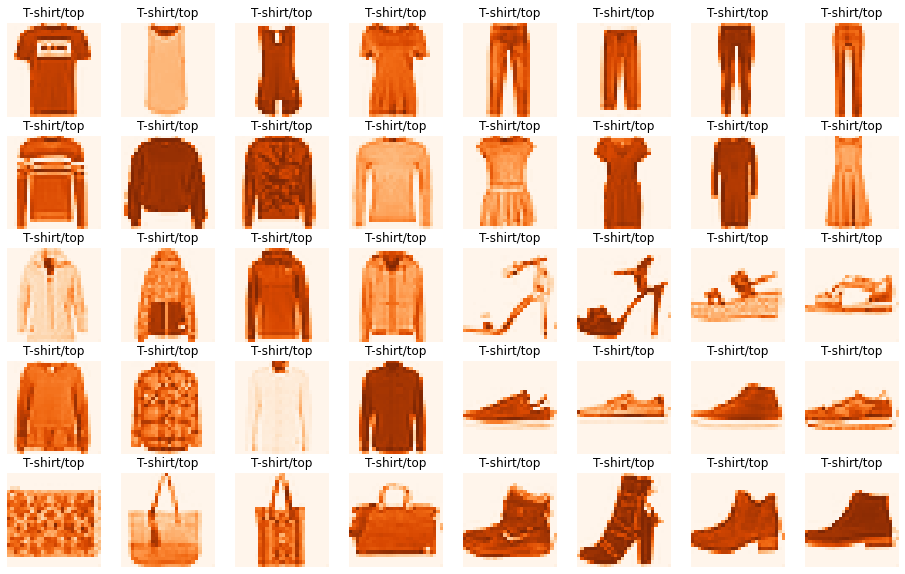

In [ ]:
def plot_sample_images(data_sample_images,data_sample_labels,cmap="Blues"):
    # Plot the sample images now
    f, ax = plt.subplots(5,8, figsize=(16,10))

    for i, img in enumerate(data_sample_images):
        ax[i//8, i%8].imshow(img, cmap=cmap)
        ax[i//8, i%8].axis('off')
        ax[i//8, i%8].set_title(labels[data_sample_labels[i]])
    plt.show()    
    
plot_sample_images(train_sample_images,train_sample_labels, "Oranges")

In [ ]:
# one hot encode target values
from keras.utils.np_utils import to_categorical
trainY = to_categorical(y_train)
testY = to_categorical(y_test)

print("trainY: "+str(trainY.shape))
print("testY: "+str(testY.shape))

trainY: (60000, 10)
testY: (10000, 10)


In [ ]:
# scale data to the range of [0, 1]
trainX = X_train.astype("float32") / 255.0
testX = X_test.astype("float32") / 255.0

In [ ]:
# reshape the data arrays to have a single color channel.
from sklearn.model_selection import train_test_split
trainX = trainX.reshape((trainX.shape[0], r, c, 1))
testX = testX.reshape((testX.shape[0], r, c, 1))

X_train, X_val, y_train, y_val = train_test_split(trainX, trainY, test_size=0.2, random_state=42)

print("trainX: "+str(X_train.shape))
print("validationX: "+str(X_val.shape))
print("trainY: "+str(y_train.shape))
print("validationY: "+str(y_val.shape))

trainX: (48000, 28, 28, 1)
validationX: (12000, 28, 28, 1)
trainY: (48000, 10)
validationY: (12000, 10)


In [ ]:
# import keras libraries
from tensorflow.python import keras
from keras.models import load_model # to save the model
from sklearn.metrics import confusion_matrix # to compute confusion matrix to evaluate the accuracy of a classification
from keras.utils.np_utils import to_categorical # to encode categorical integer features as a one-hot numeric array.
from keras.datasets import fashion_mnist # to load the fashion mnist dataset
from sklearn.model_selection import train_test_split # cross validation
from keras.preprocessing.image import ImageDataGenerator # for Image Augmentation
from keras.regularizers import l2,l1 # regularization


# libraries for construction of CNN model
from keras.models import Sequential
from keras.layers.convolutional import Conv2D
from keras.layers.convolutional import MaxPooling2D
from keras.layers.core import Activation
from keras.layers.core import Flatten
from keras.layers.core import Dropout
from keras.layers.core import Dense


# Model
cnn1 = Sequential()
# Add convolution 2D
cnn1.add(Conv2D(32, kernel_size=(3, 3),
                 activation='relu',
                 kernel_initializer='he_normal',
                 input_shape=(ROWS, COLUMNS, 1)))
cnn1.add(MaxPooling2D((2, 2)))
cnn1.add(Conv2D(64, 
                 kernel_size=(3, 3), 
                 activation='relu'))
cnn1.add(MaxPooling2D(pool_size=(2, 2)))
cnn1.add(Conv2D(128, (3, 3), activation='relu'))
cnn1.add(Flatten())
cnn1.add(Dense(128, activation='relu'))
cnn1.add(Dense(CLASS, activation='softmax'))


cnn1.compile(loss=keras.losses.categorical_crossentropy,
              optimizer='adam',
              metrics=['accuracy'])

cnn1.summary()


Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 13, 13, 32)       0         
 2D)                                                             
                                                                 
 conv2d_4 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 5, 5, 64)         0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 3, 3, 128)         73856     
                                                                 
 flatten_1 (Flatten)         (None, 1152)             

In [ ]:
import time
start_time = time.time()
train_model = cnn1.fit(X_train, y_train,
                  batch_size=128,
                  epochs=5,
                  verbose=1,
                  validation_data=(X_val, y_val))
end_time = time.time()
duration = end_time - start_time

Epoch 1/5
375/375 [==============================] - 46s 122ms/step - loss: 0.2467 - accuracy: 0.9115 - val_loss: 0.2710 - val_accuracy: 0.8966
Epoch 2/5
375/375 [==============================] - 43s 116ms/step - loss: 0.2225 - accuracy: 0.9182 - val_loss: 0.2719 - val_accuracy: 0.9004
Epoch 3/5
375/375 [==============================] - 44s 116ms/step - loss: 0.1992 - accuracy: 0.9270 - val_loss: 0.2457 - val_accuracy: 0.9103
Epoch 4/5
375/375 [==============================] - 44s 116ms/step - loss: 0.1790 - accuracy: 0.9333 - val_loss: 0.2649 - val_accuracy: 0.9029
Epoch 5/5
375/375 [==============================] - 44s 117ms/step - loss: 0.1621 - accuracy: 0.9412 - val_loss: 0.2539 - val_accuracy: 0.9118


In [ ]:
score = cnn1.evaluate(testX, testY, verbose=1)
print('Test loss:', score[0])
print('Test accuracy:', score[1])
print('Duration: ',duration)

313/313 [==============================] - 3s 10ms/step - loss: 0.2676 - accuracy: 0.9098
Test loss: 0.2675911486148834
Test accuracy: 0.9097999930381775
Duration:  261.9904806613922


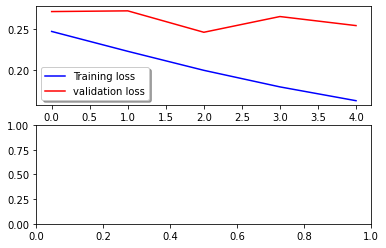

In [ ]:
fig, ax = plt.subplots(2,1)
ax[0].plot(train_model.history['loss'], color='b', label="Training loss")
ax[0].plot(train_model.history['val_loss'], color='r', label="validation loss",axes =ax[0])
legend = ax[0].legend(loc='best', shadow=True)

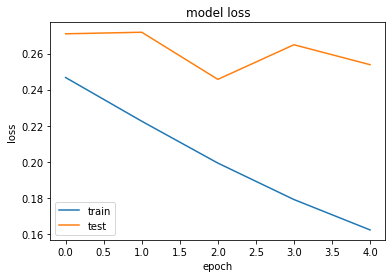

In [ ]:
plt.plot(train_model.history['loss'])
plt.plot(train_model.history['val_loss'])
plt.title('Training and Test Loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train loss', 'test loss'])
plt.show()

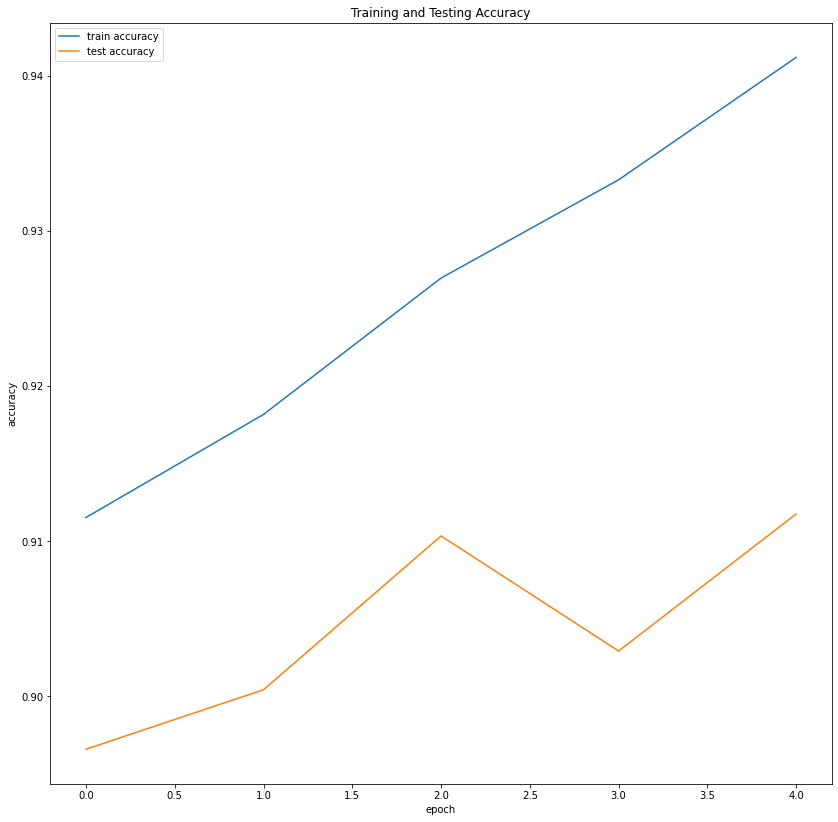

In [ ]:
plt.plot(train_model.history['accuracy'])
plt.plot(train_model.history['val_accuracy'])
plt.title('Training and Testing Accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train accuracy', 'test accuracy'])
plt.show()

In [ ]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report

y_pred = cnn1.predict(X_test)
y_pred = np.argmax(y_pred, axis=1)
acc = accuracy_score(y_test,y_pred)
class_report = classification_report(y_test,y_pred)
print('The accuracy: {}'.format(acc))
print('The Classification Report:\n {}'.format(class_report))

The accuracy: 0.1174
The Classification Report:
               precision    recall  f1-score   support

           0       0.11      0.98      0.20      1000
           1       0.00      0.00      0.00      1000
           2       0.00      0.00      0.00      1000
           3       0.00      0.00      0.00      1000
           4       0.14      0.01      0.01      1000
           5       0.27      0.19      0.22      1000
           6       0.00      0.00      0.00      1000
           7       0.00      0.00      0.00      1000
           8       0.00      0.00      0.00      1000
           9       0.00      0.00      0.00      1000

    accuracy                           0.12     10000
   macro avg       0.05      0.12      0.04     10000
weighted avg       0.05      0.12      0.04     10000



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


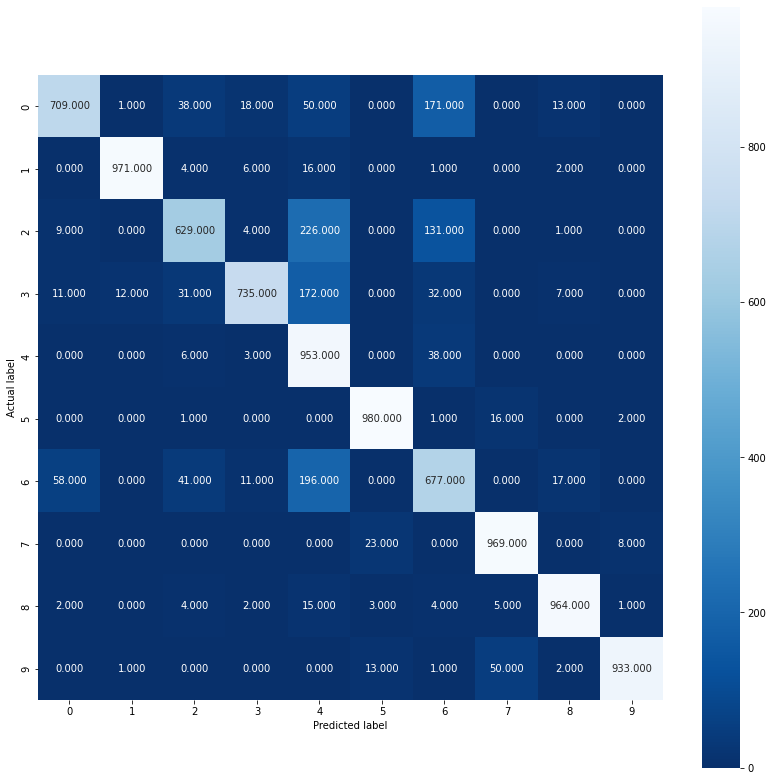

In [ ]:
import seaborn as sns
plt.rcParams["figure.figsize"] = [14, 14]
sns.heatmap(cm, annot=True, fmt=".3f", square = True, cmap = 'Blues_r');
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
plt.show()

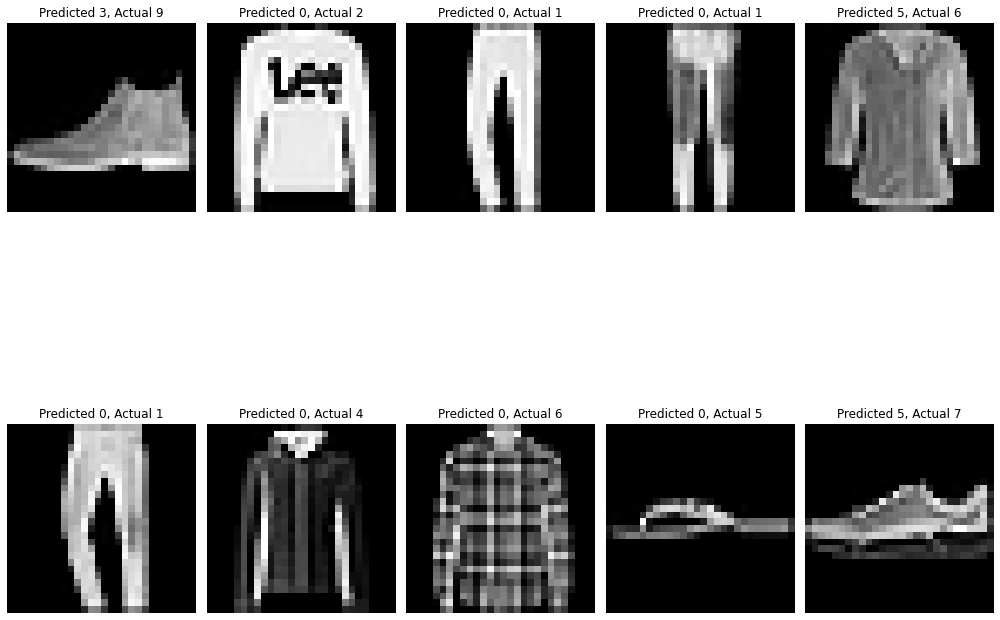

In [ ]:
for i in range(10):
  plt.subplot(2, 5, i+1)
  plt.imshow(X_test[i].reshape(28, 28), cmap='gray')
  plt.title("Predicted {}, Actual {}".format(y_pred[i], y_test[i]))
  plt.axis('off')
plt.tight_layout()